# Conversion Rate

## Goal

Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so.\
The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don't. This gives us a tremendous opportunity to understand what's working well (and potentially scale it even further) and what's not working well (and fix it).\
The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve re]enue.\
This challenge is significantly easier than all others in this collection. here are no dates, no tables to join, no feature engineering required, and the problem is really straightforward. Therefore, it is a great starting point to get familiar with data science takehome challenges.

## Challenge Description

We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).\
Your project is to:
* Predict conversion rate
* Come up with recommendations for the product team and the marketing team to improve conversion rate

## Data

* **country** : user country based on the IP address
* **age** : user age. Self-reported at sign-in step
* **new_user** : whether the user created the account during this session or had already an account and simply came back to the site
* **source** : marketing channel source
    - Ads: came to the site by clicking on an advertisement
    - Seo: came to the site by clicking on search results
    - Direct: came to the site by directly typing the URL on the browser
* **total_pages_visited**: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
* **converted**: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions.

===================================================================================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("F:\Data_Science\Product_sense\DS take home challenges\Dataset")

In [3]:
raw_data = pd.read_csv('conversion_project.csv')
raw_data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### Basic info

In [4]:
raw_data.shape

(316200, 6)

In [5]:
raw_data.iloc[:,-1].value_counts()    # 1: 30

0    306000
1     10200
Name: converted, dtype: int64

1/30 users are converted

In [6]:
raw_data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


no nulls\
maximum age seems unrealistic

most users are young \
68.5% users created a new account\
On average, users visited 4 pages

In [7]:
# look at non-numerical features
raw_data.loc[:,'country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [8]:
raw_data.loc[:,'source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

### Remove Outliers

In [9]:
raw_data[raw_data.loc[:,'age'] >= 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


Only two people's age are larger than 100, we can simply remove them

In [10]:
raw_data = raw_data[raw_data.loc[:,'age'] < 100]

In [11]:
raw_data.shape

(316198, 6)

In [12]:
raw_data.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


### Exploratory Data Analysis

In [13]:
raw_data.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


#### 1. Visualization of country and conversion_rate


In [14]:
country_count = raw_data.iloc[:, 0].value_counts().sort_index()    # .sort_index()的用法，为了和下面保持一致
country_count

China       76602
Germany     13055
UK          48449
US         178092
Name: country, dtype: int64

In [15]:
group_by_country = raw_data.groupby('country')['converted'].mean()
group_by_country

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

Text(0, 0.5, 'Conversion rate')

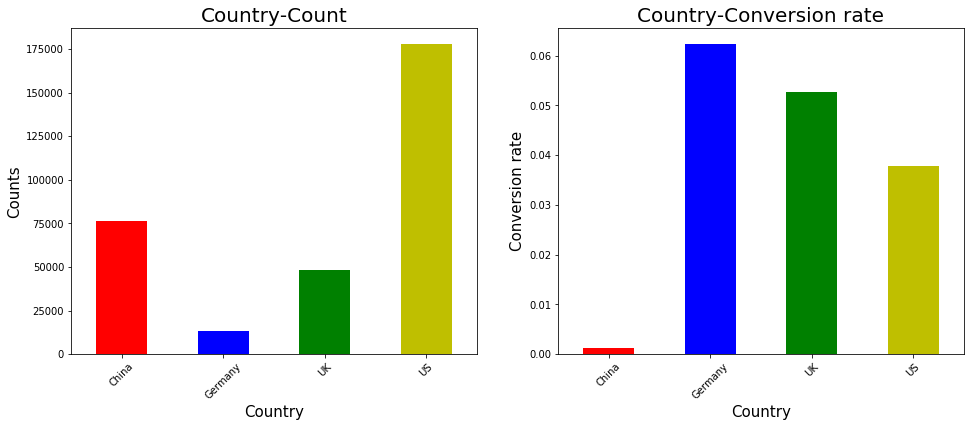

In [16]:
plt.figure(figsize = (16, 6))
plt.subplot(121)
country_count.plot(kind = 'bar', color = ['r', 'b', 'g', 'y'])
plt.title('Country-Count', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)
plt.subplot(122)
group_by_country.plot(kind = 'bar', color = ['r', 'b', 'g', 'y'])
plt.title('Country-Conversion rate', fontsize = 20)
plt.xticks(rotation = 45)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Conversion rate', fontsize = 15)

Conversion rate in China is extremely low compared to other countries

#### 2. Visualization of age and conversion_rate

In [17]:
group_by_age = raw_data[['age', 'converted']].groupby('age').mean().reset_index()   
# learn how to extract the columns
group_by_age.head()

,age,converted
0,17,0.071607
1,18,0.066029
2,19,0.058616
3,20,0.057109
4,21,0.053985


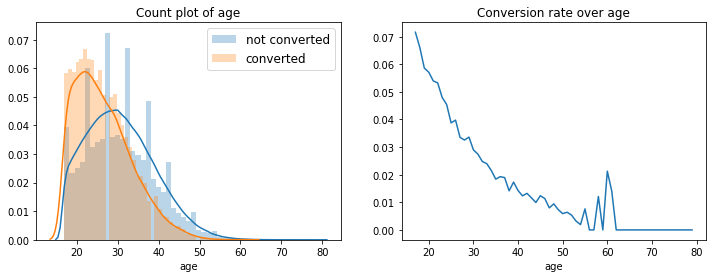

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.distplot(raw_data[raw_data['converted'] == 0]['age'], 
             label = 'not converted',
             hist_kws={'alpha': 0.3})
sns.distplot(raw_data[raw_data['converted'] == 1]['age'], 
             label = 'converted',
             hist_kws={'alpha': 0.3})
plt.title('Count plot of age')
plt.legend(loc = 'best', fontsize = 12)
plt.subplot(122)
plt.plot(group_by_age['age'], group_by_age['converted'])
plt.xlabel('age')
plt.title('Conversion rate over age')
plt.show()

Most conversion happens in people around 20-30.\
As age increases, conversion rate decreases.\
There is a fluctuation around age 55-60

#### 3. Visualization of new user and conversion_rate

In [19]:
group_by_new_user = raw_data[['new_user', 'converted']].groupby('new_user').mean().reset_index()   
group_by_new_user.head()

,new_user,converted
0,0,0.071983
1,1,0.014021


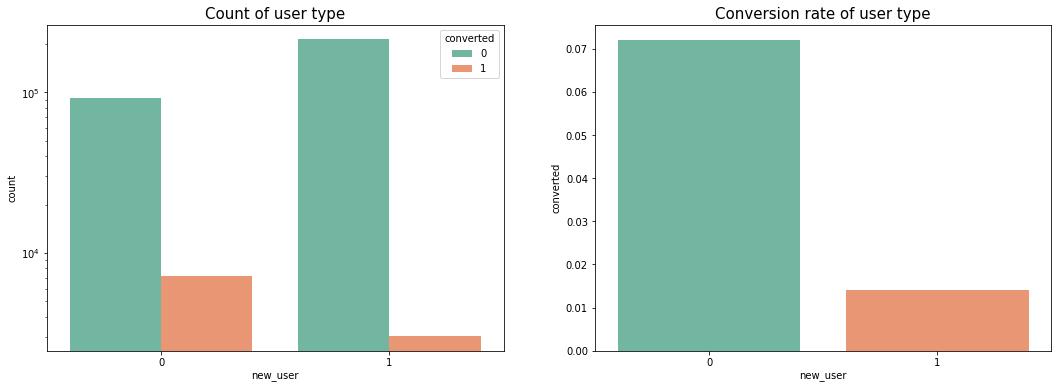

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.countplot(x = 'new_user', hue = 'converted', data = raw_data, ax = ax[0], palette = 'Set2')     
# sns.countplot()
ax[0].set_yscale('log')
ax[0].set_title('Count of user type', fontsize = 15)
sns.barplot(x = 'new_user', y = 'converted', data = group_by_new_user, ax = ax[1], palette = 'Set2')  
ax[1].set_title('Conversion rate of user type', fontsize = 15)
plt.show()

New users are less likely for conversion

#### 4. Visualization of source and conversion_rate

In [21]:
group_by_source = raw_data[['source', 'converted']].groupby('source').mean().reset_index()   
group_by_source.head()

,source,converted
0,Ads,0.034472
1,Direct,0.028169
2,Seo,0.032888


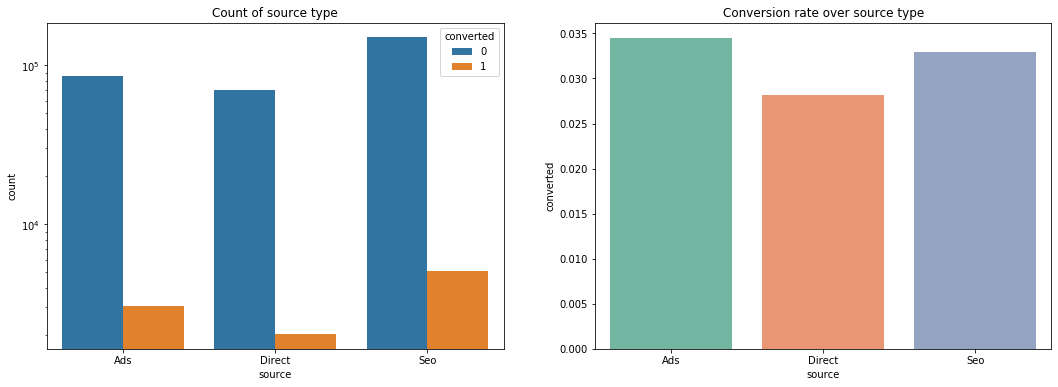

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))
sns.countplot(x = 'source', 
              data = raw_data, 
              hue='converted', 
              ax = ax[0], 
              order=['Ads', 'Direct','Seo'])    # make sure x in two figures have the same sequence
ax[0].set_yscale('log')
ax[0].set_title('Count of source type')
sns.barplot(x = 'source', 
            y = 'converted', 
            data = group_by_source, 
            ax = ax[1], 
            palette='Set2')
ax[1].set_title('Conversion rate over source type')
plt.show()

#### 5. Visualization of the number of pages visited and conversion_rate

In [23]:
group_by_page_visited = raw_data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()   
group_by_page_visited.head()

,total_pages_visited,converted
0,1,0.000000
1,2,0.000228
2,3,0.000251
3,4,0.000780
4,5,0.001570


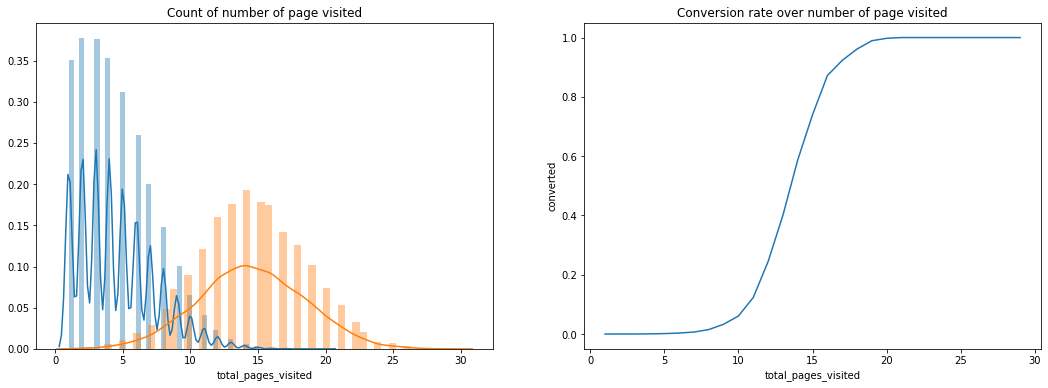

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 6))
sns.distplot(raw_data[raw_data['converted'] == 0]['total_pages_visited'], 
             label = 'not converted',
             ax = ax[0])    
sns.distplot(raw_data[raw_data['converted'] == 1]['total_pages_visited'], 
             label = 'converted',norm_hist=True,
             ax = ax[0]) 
ax[0].set_title('Count of number of page visited')
sns.lineplot(x = 'total_pages_visited', 
            y = 'converted', 
            data = group_by_page_visited, 
            ax = ax[1])
ax[1].set_title('Conversion rate over number of page visited')
plt.show()

Conversion rate is higher after people open 10-20 pages

spending more time on the site implies higher probability of conversion

### Machine Learning

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix as cm

In [25]:
# divide features and label
raw_X = raw_data.iloc[:, :-1]
y = raw_data.iloc[:, -1]

In [26]:
X = pd.get_dummies(raw_X)    # encode the categorical data

In [30]:
# split train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [50]:
rfc = RandomForestClassifier(n_estimators=100,
                             random_state=42)

In [51]:
rfc.fit(Xtrain, ytrain)    # train the model

RandomForestClassifier(random_state=42)

In [52]:
rfc.score(Xtest, ytest)   # calculate the accuracy score

0.9841661395741093

In [53]:
# import roc modules
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import auc

In [71]:
# FPR, recall, area of train set
FPR_tr, recall_tr, thresholds_tr = roc_curve(ytrain, rfc.predict_proba(Xtrain)[:,1], pos_label=1)
area_train = AUC(ytrain, rfc.predict(Xtrain))

In [72]:
# FPR, recall, area of test set
FPR_te, recall_te, thresholds_te = roc_curve(ytest, rfc.predict_proba(Xtest)[:,1], pos_label=1)
area_test = AUC(ytest, rfc.predict(Xtest))

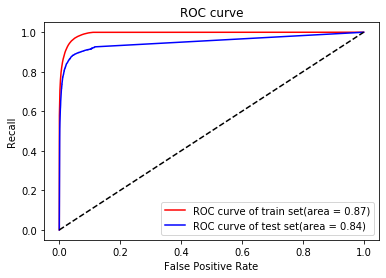

In [73]:
# draw roc curve
plt.figure()
plt.plot(FPR_tr, recall_tr, color='red',label='ROC curve of train set(area = %0.2f)' % area_train)
plt.plot(FPR_te, recall_te, color='blue',label='ROC curve of test set(area = %0.2f)' % area_test)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc="best")
plt.show()

In [58]:
from sklearn.metrics import classification_report

In [61]:
# print classification report
print(classification_report(ytest, rfc.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     91789
           1       0.80      0.68      0.73      3071

    accuracy                           0.98     94860
   macro avg       0.90      0.84      0.86     94860
weighted avg       0.98      0.98      0.98     94860



In [70]:
# see the importance of each feature
importance = rfc.feature_importances_
indice = np.argsort(importance)[::-1]     # get indices of sorted importance
for i in range(len(Xtrain.columns)):
    print(i+1, Xtrain.columns[indice[i]], importance[indice[i]])

1 total_pages_visited 0.8052791574609444
2 age 0.11440124997981746
3 new_user 0.03868254135194107
4 country_China 0.021236630321830173
5 country_US 0.004558864550501052
6 country_UK 0.004480861376976558
7 source_Ads 0.0028699790578632445
8 source_Seo 0.0028633555247379186
9 country_Germany 0.0028188567270396687
10 source_Direct 0.002808503648348551


the top 3 important features are total_pages_visited, age and whether he/she is a new user

In [74]:
#  grid search 
rfc = RandomForestClassifier(class_weight='balanced', random_state = 42)  

param_rf = {'n_estimators': range(1,501,100),
            'max_depth': range(1,20,4), 
            'min_samples_leaf': np.arange(1,10,2)}

gs_rf = GridSearchCV(estimator = rfc,
                     param_grid = param_rf,
                     cv = 5,
                     scoring = 'roc_auc'
                    ).fit(Xtrain, ytrain)

print(gs_rf.best_score_, gs_rf.best_params_)

0.9845127186126401 {'max_depth': 9, 'min_samples_leaf': 9, 'n_estimators': 401}


In [75]:
# put in the best parameters
rfc_best = RandomForestClassifier(n_estimators=401,
                                 max_depth=9,
                                 min_samples_leaf=9,
                                 class_weight='balanced',
                                 random_state=42)

In [76]:
rfc_best.fit(Xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=9,
                       n_estimators=401, random_state=42)

In [77]:
y_test_pred = rfc_best.predict(Xtest)

In [80]:
print('ROC of test set is : ', AUC(ytest, y_test_pred))
print('Accuracy score of test set is: ', sklearn.metrics.accuracy_score(ytest, y_test_pred))

ROC of test set is :  0.9366202487697609
Accuracy score of test set is:  0.9483027619650011


the roc-auc score has increased a lot from 0.68 to 0.95 while the accuracy score remains high, which is 94.8%

### Overall analysis

* The site is working very well for young users. Definitely let’s tell marketing to advertise and use
marketing channel which are more likely to reach young people.
* The site is working very well for Germany in terms of conversion. But the summary showed that
there are few Germans coming to the site: way less than UK, despite a larger population. Again,
marketing should get more Germans. Big opportunity.
* Users with old accounts do much better. Targeted emails with offers to bring them back to the site
could be a good idea to try.
* Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the
local culture, some payment issue or maybe it is just in English! Given how many users are based in
China, fixing this should be a top priority. Huge opportunity.
* Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion
clearly starts dropping.
* If I know someone has visited many pages（total_pages_visited are high）, but hasn’t converted, she almost surely has high
purchase intent. I could email her targeted offers or sending her reminders. Overall, these are
probably the easiest users to make convert.